In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.22'

In [2]:
def filter_Ne_Line_neighbours(Corr_factor, number_av=6, offset=0.00005):
    Corr_factor_Filt=np.empty(len(Corr_factor), dtype=float)
    median_loop=np.empty(len(Corr_factor), dtype=float)

    for i in range(0, len(Corr_factor)): 
        if i<len(Corr_factor)/2: # For first half, do 5 after
            median_loop[i]=np.nanmedian(Corr_factor[i:i+number_av])
        if i>=len(Corr_factor)/2: # For first half, do 5 after
            median_loop[i]=np.nanmedian(Corr_factor[i-number_av:i])
        if Corr_factor[i]>(median_loop[i]+offset) or Corr_factor[i]<(median_loop[i]-offset) :
            Corr_factor_Filt[i]=np.nan
        else:
            Corr_factor_Filt[i]=Corr_factor[i]
    ds=pd.Series(Corr_factor_Filt)
    return ds
    

In [3]:
df2_1117_1447=pd.read_excel('1117_1447_72hr.xlsx')
df2_1220_1400=pd.read_excel('1200_1400_72hr.xlsx')
df2_1310_1567=pd.read_excel('1300_1567_72hr.xlsx')

## What should peak positions be

In [4]:
wavelength =532.046 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=100)
df_Ne

,Raman_shift (cm-1),Intensity,Ne emission line in air
0,817.650482,1500.0,556.24416
1,818.699523,5000.0,556.27662
2,819.626623,750.0,556.30531
3,861.491169,350.0,557.60394
5,904.190330,500.0,558.93472
7,1104.288094,750.0,565.25664
8,1115.108504,750.0,565.60258
9,1117.086987,5000.0,565.66588
11,1135.475674,750.0,566.25489
12,1204.125505,250.0,568.46470


In [5]:
ideal_split_1117_1447=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=1000)
ideal_split_1117_1447

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1117.086987,1447.564622,1117,1447


In [6]:
Corr_factor_1447=ideal_split_1117_1447['Line_2'].values/df2_1117_1447['pk2_peak_cent']
#Corr_factor_1447_Filt=Corr_factor_1447[(Corr_factor_1447>0.9994)&(Corr_factor_1447<0.99965)]

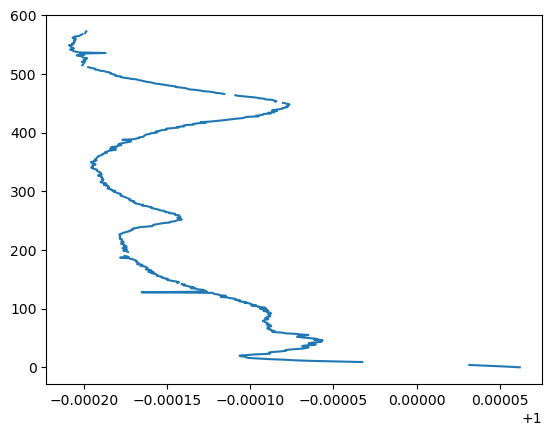

In [7]:
Corr_factor_1447_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1447, 
                                                number_av=6, offset=0.00005)
plt.plot(Corr_factor_1447_filt, Corr_factor_1447_filt.index)

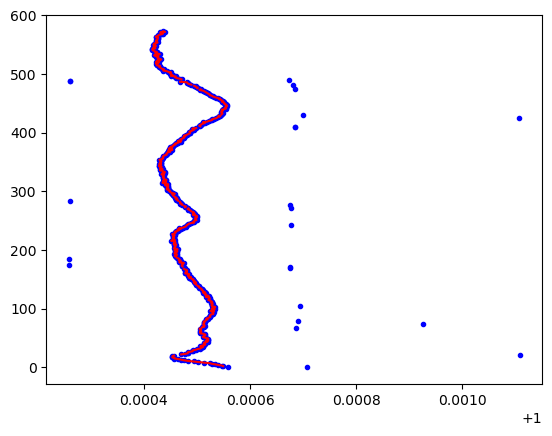

In [8]:
Corr_factor_1117=ideal_split_1117_1447['Line_1'].values/df2_1117_1447['pk1_peak_cent']

Corr_factor_1117_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1117, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1117, Corr_factor_1117.index, '.b')
plt.plot(Corr_factor_1117_filt, Corr_factor_1117_filt.index, '-r')

In [9]:
ideal_split_1310_1567=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1310, line2_shift=1567,
                                     cut_off_intensity=1000)
ideal_split_1310_1567

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,256.724773,1310.480205,1567.204978,1310,1567


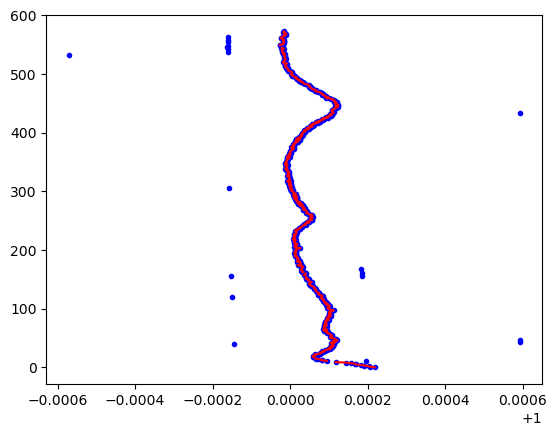

In [10]:
Corr_factor_1310=ideal_split_1310_1567['Line_1'].values/df2_1310_1567['pk1_peak_cent']

Corr_factor_1310_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1310, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1310, Corr_factor_1310.index, '.b')
plt.plot(Corr_factor_1310_filt, Corr_factor_1310_filt.index, '-r')

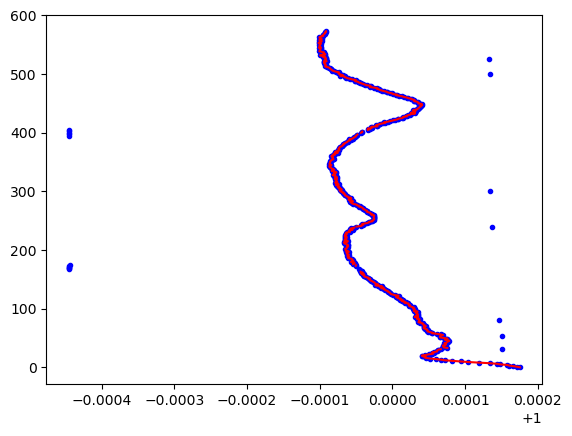

In [11]:
Corr_factor_1567=ideal_split_1310_1567['Line_2'].values/df2_1310_1567['pk2_peak_cent']

Corr_factor_1567_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1567, 
                                                number_av=12, offset=0.00007)

plt.plot(Corr_factor_1567, Corr_factor_1567.index, '.b')
plt.plot(Corr_factor_1567_filt, Corr_factor_1567_filt.index, '-r')

## 1220-1400


In [12]:
ideal_split_1220_1400=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1220, line2_shift=1400,
                                     cut_off_intensity=1000)
ideal_split_1220_1400

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,178.80767,1220.107463,1398.915133,1220,1400


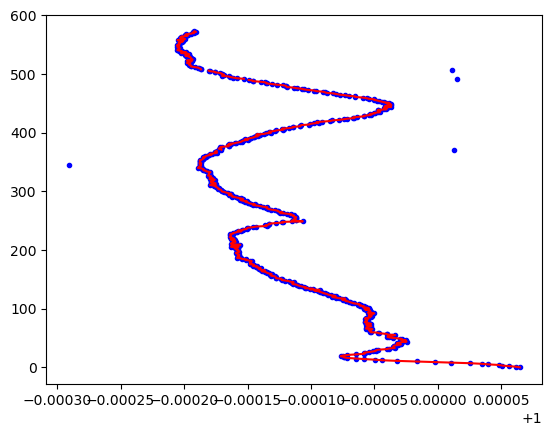

In [13]:
Corr_factor_1400=ideal_split_1220_1400['Line_2'].values/df2_1220_1400['pk2_peak_cent']

Corr_factor_1400_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1400, 
                                                number_av=6, offset=0.00005)

plt.plot(Corr_factor_1400, Corr_factor_1400.index, '.b')
plt.plot(Corr_factor_1400_filt, Corr_factor_1400_filt.index, '-r')

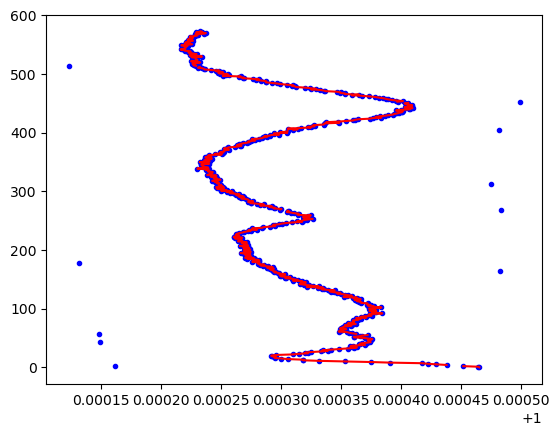

In [14]:
Corr_factor_1220=ideal_split_1220_1400['Line_1'].values/df2_1220_1400['pk1_peak_cent']

Corr_factor_1220_filt=filter_Ne_Line_neighbours(Corr_factor=Corr_factor_1220, 
                                                number_av=6, offset=0.00009)

plt.plot(Corr_factor_1220, Corr_factor_1220.index, '.b')
plt.plot(Corr_factor_1220_filt, Corr_factor_1220_filt.index, '-r')

In [15]:
Corr_factor_1400_filt

0      1.000064
1      1.000062
2      1.000056
3      1.000050
4      1.000048
         ...   
569    0.999805
570    0.999808
571    0.999807
572    0.999809
573    0.999808
Length: 574, dtype: float64

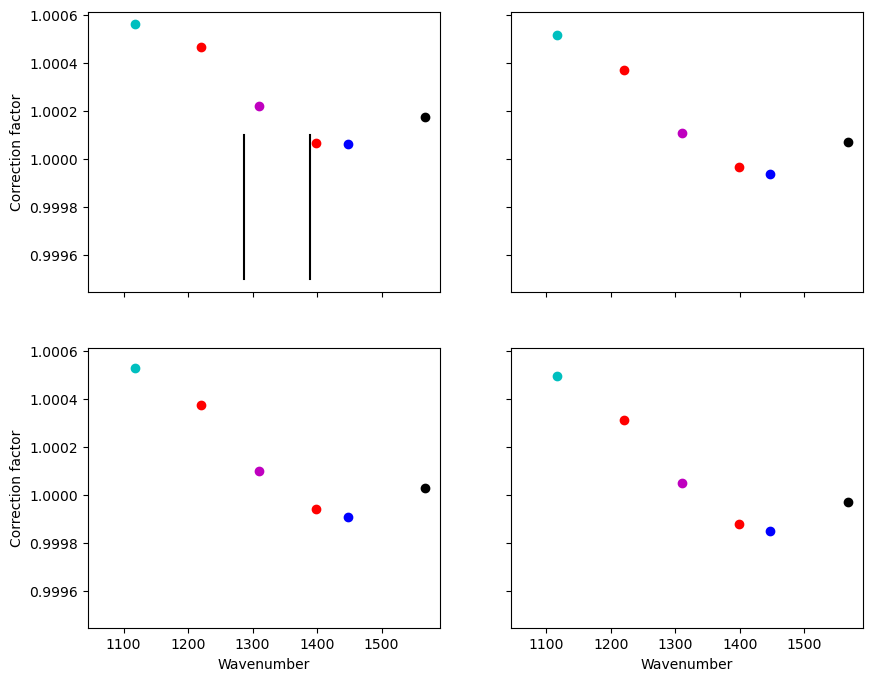

In [16]:
fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8), sharex=True, sharey=True) # adjust dimensions of figure 
i=0
ax0.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax0.plot(ideal_split_1220_1400['Line_1'], Corr_factor_1220_filt[i], 'or')
ax0.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax0.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax0.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax0.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

i=50
ax1.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax1.plot(ideal_split_1220_1400['Line_1'], Corr_factor_1220_filt[i], 'or')
ax1.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax1.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax1.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax1.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

i=100
ax3.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax3.plot(ideal_split_1220_1400['Line_1'], Corr_factor_1220_filt[i], 'or')
ax3.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax3.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax3.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax3.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')

i=150
ax4.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax4.plot(ideal_split_1220_1400['Line_1'], Corr_factor_1220_filt[i], 'or')
ax4.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax4.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax4.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax4.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')
ax3.set_xlabel('Wavenumber')
ax4.set_xlabel('Wavenumber')

ax3.set_ylabel('Correction factor')
ax0.set_ylabel('Correction factor')

ax0.ticklabel_format(useOffset=False)
ax1.ticklabel_format(useOffset=False)
ax3.ticklabel_format(useOffset=False)
ax4.ticklabel_format(useOffset=False)
ax1.set_xlim([1045, 1591])

ax0.plot([1287, 1287], [0.9995, 1.0001], '-k')
ax0.plot([1389, 1389], [0.9995, 1.0001], '-k')

In [17]:
corr_c=pd.DataFrame(data={'1117_Corr': Corr_factor_1117_filt,
                              '1117_peak':ideal_split_1117_1447['Line_1'],
                          '1220_Corr': Corr_factor_1220_filt,
                              '1220_peak':ideal_split_1220_1400['Line_1'],
                              '1310_Corr': Corr_factor_1310_filt,
                              '1310_peak': ideal_split_1310_1567['Line_1'],
                            '1400_Corr': Corr_factor_1400_filt,
                              '1400_peak': ideal_split_1220_1400['Line_2'],
                              '1447_Corr': Corr_factor_1447_filt,
                          '1447_peak': ideal_split_1117_1447['Line_2'],
                              '1567_Corr': Corr_factor_1567_filt,
                             '1567_peak': ideal_split_1310_1567['Line_2']})


In [18]:
corr_factor=pd.DataFrame(data={'1117_Corr': Corr_factor_1117_filt,
                               '1220_Corr': Corr_factor_1220_filt,
                              '1310_Corr': Corr_factor_1310_filt,
                              
                            '1400_Corr': Corr_factor_1400_filt,
                             
                              '1447_Corr': Corr_factor_1447_filt,
                                 '1567_Corr': Corr_factor_1567_filt})
sumro=corr_factor.sum(axis=1)
#corr_factor_Filt=corr_factor[(sumro>3.9) & (sumro<4.1)]
corr_factor_Filt=corr_factor[(sumro>5.9) & (sumro<6.1)]
                           
                             # '1567_peak': ideal_split_1310_1567['Line_2']})


In [19]:
sumro

0      6.001544
1      5.000959
2      6.001474
3      5.000989
4      6.001398
         ...   
569    5.000374
570    6.000174
571    6.000158
572    6.000177
573    6.000172
Length: 574, dtype: float64

In [20]:
corr_peaks=pd.DataFrame(data={
                              '1117_peak':ideal_split_1117_1447['Line_1'],
    '1220_peak':ideal_split_1220_1400['Line_1'],
                              '1310_peak': ideal_split_1310_1567['Line_1'],   
                              '1400_peak': ideal_split_1220_1400['Line_2'],
                             '1447_peak': ideal_split_1117_1447['Line_2'],
                             '1567_peak': ideal_split_1310_1567['Line_2']})


In [21]:
corr_peaks.head()

,1117_peak,1220_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1220.107463,1310.480205,1398.915133,1447.564622,1567.204978


In [22]:
corr_peaks

,1117_peak,1220_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1220.107463,1310.480205,1398.915133,1447.564622,1567.204978


Text(0, 0.5, 'Correction factor')

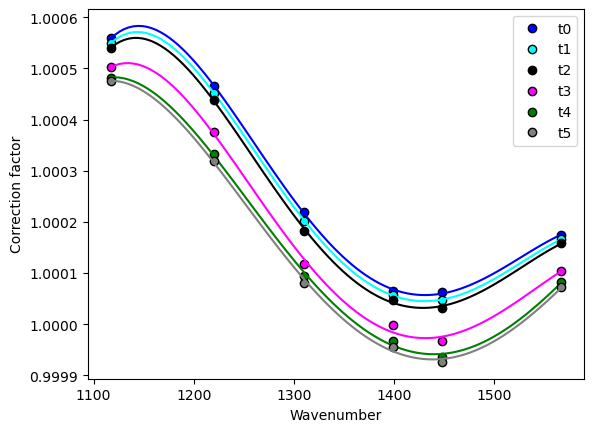

In [23]:
color=['red', 'blue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
for i in [0, 1, 2, 3, 4, 5]:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)
    plt.plot(x, y, 'ok', mfc=color[n], label=text)
    plt.plot(Px, Py, '-', color=color[n])
    plt.legend()
    
plt.ticklabel_format(useOffset=False)

plt.xlabel('Wavenumber')
plt.ylabel('Correction factor')


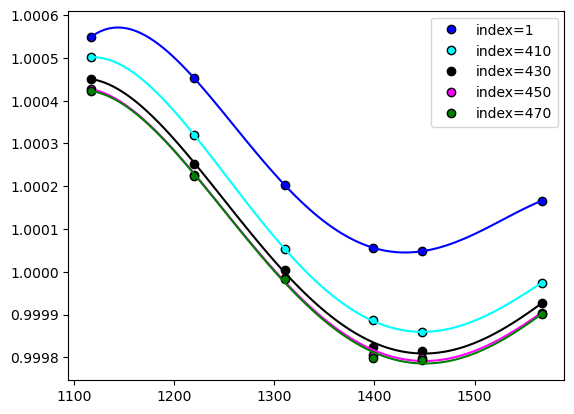

In [85]:
color=['red', 'blue', 'cyan', 'black', 'magenta', 'green']
n=0
for i in [1, 410, 430, 450, 470]:
    n=n+1
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)
    plt.plot(x, y, 'ok', mfc=color[n], label='index='+str(i))
    plt.plot(Px, Py, '-', color=color[n])
    plt.legend()
    
plt.ticklabel_format(useOffset=False)

In [25]:
Pf

poly1d([-5.55767527e-14,  3.15879762e-10, -6.63214973e-07,  6.08648997e-04,
        7.94338285e-01])

In [26]:
y_test=Pf[4]*(1150**4)+Pf[3]*(1150**3)+Pf[2]*(1150**2)+Pf[1]*1150+Pf[0]
y_test

1.0003923750495878

In [27]:
corr_peaks

,1117_peak,1220_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1220.107463,1310.480205,1398.915133,1447.564622,1567.204978


In [28]:
Pf(1150)

1.0003923750495878

In [29]:
len(corr_peaks)

1

## Trying to loop through this for a single diad position

Text(0, 0.5, 'Correction factor')

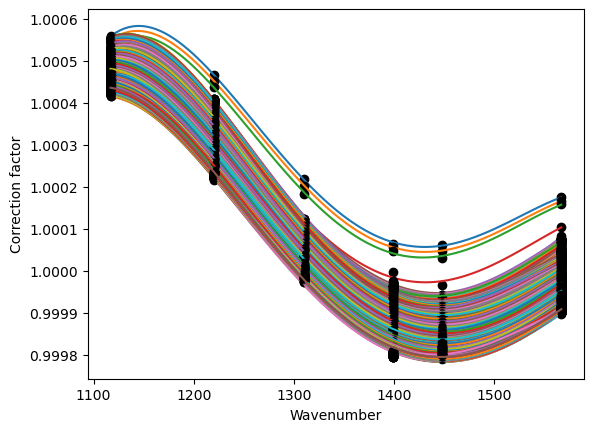

In [55]:
x4_coeff=np.empty(len(corr_factor_Filt), dtype=float)
x3_coeff=np.empty(len(corr_factor_Filt), dtype=float)
x2_coeff=np.empty(len(corr_factor_Filt), dtype=float)
x_coeff=np.empty(len(corr_factor_Filt), dtype=float)
const_coeff=np.empty(len(corr_factor_Filt), dtype=float)
for i in range(0, len(corr_factor_Filt)):
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
   
    x4_coeff[i]=Pf[4]
    x3_coeff[i]=Pf[3]
    x2_coeff[i]=Pf[2]
    x_coeff[i]=Pf[1]
    const_coeff[i]=Pf[0]
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    plt.plot(x, y, 'ok', label=text)
    plt.plot(Px, Py, '-')
    #plt.legend()
    
plt.ticklabel_format(useOffset=False)

plt.xlabel('Wavenumber')
plt.ylabel('Correction factor')


In [66]:
Pf

poly1d([-6.21811006e-14,  3.51250518e-10, -7.33803157e-07,  6.70844094e-04,
        7.73933319e-01])

## how does this all change iwth temperature?

In [67]:
corr_peaks

,1117_peak,1220_peak,1310_peak,1400_peak,1447_peak,1567_peak
0,1117.086987,1220.107463,1310.480205,1398.915133,1447.564622,1567.204978


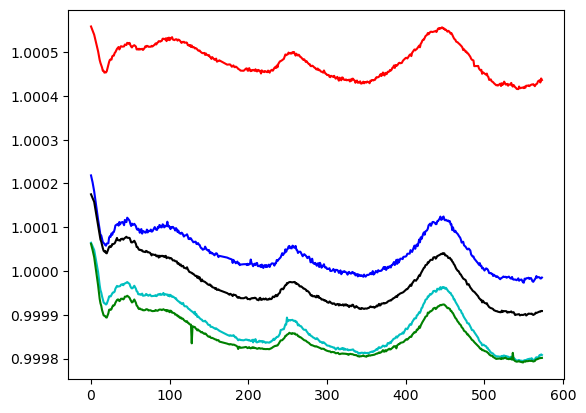

In [68]:
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1117_Corr'], '-r')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1310_Corr'], '-b')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1400_Corr'], '-c')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1447_Corr'], '-g')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1567_Corr'], '-k')

plt.ticklabel_format(useOffset=False)

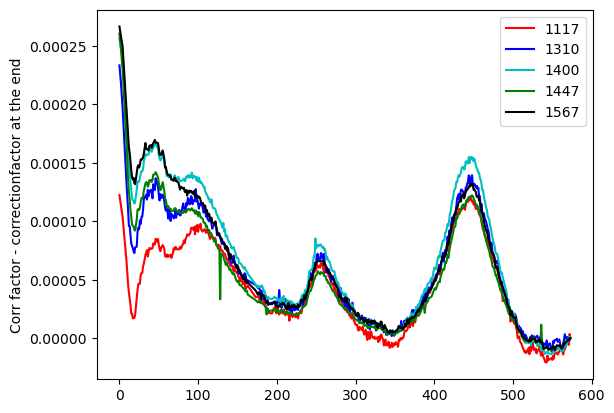

In [69]:
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1117_Corr']-corr_factor_Filt['1117_Corr'].iloc[-1], '-r', label='1117')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1310_Corr']-corr_factor_Filt['1310_Corr'].iloc[-1], '-b', label='1310')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1400_Corr']-corr_factor_Filt['1400_Corr'].iloc[-1], '-c', label='1400')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1447_Corr']-corr_factor_Filt['1447_Corr'].iloc[-1], '-g', label='1447')
plt.plot(corr_factor_Filt.index, corr_factor_Filt['1567_Corr']-corr_factor_Filt['1567_Corr'].iloc[-1], '-k', label='1567')
plt.legend()
plt.ylabel('Corr factor - correctionfactor at the end')
plt.ticklabel_format(useOffset=False)

In [70]:
x_diad2=1390
x_diad1=1286
split_test=x_diad2-x_diad1
Py_diad2=x4_coeff*x_diad2**4+x3_coeff*x_diad2**3+x2_coeff*x_diad2**2 + x_coeff*x_diad2 + const_coeff
Py_diad1=x4_coeff*x_diad1**4+x3_coeff*x_diad1**3+x2_coeff*x_diad1**2 + x_coeff*x_diad1 + const_coeff

x_diad2_r=1389.1
x_diad1_r=1286
split_test_r=x_diad2_r-x_diad1_r

Py_diad2_r=x4_coeff*x_diad2_r**4+x3_coeff*x_diad2_r**3+x2_coeff*x_diad2_r**2 + x_coeff*x_diad2_r + const_coeff
Py_diad1_r=x4_coeff*x_diad1_r**4+x3_coeff*x_diad1_r**3+x2_coeff*x_diad1_r**2 + x_coeff*x_diad1_r + const_coeff

In [71]:
split_test_r

103.09999999999991

In [72]:
df2_1117_1447_Filt=filter_Ne_Line_neighbours(Corr_factor=df2_1117_1447['Ne_Corr'], number_av=6, offset=0.00005)
df2_1117_1447_Filt


0      0.998387
1           NaN
2      0.998357
3      0.998332
4      0.998317
         ...   
569         NaN
570    0.997660
571    0.997679
572    0.997648
573    0.997662
Length: 574, dtype: float64

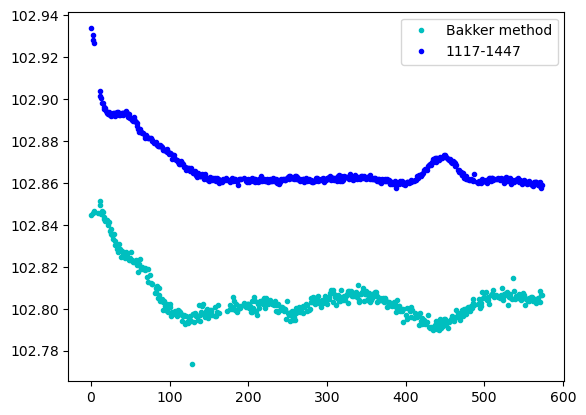

In [73]:
plt.plot(corr_factor_Filt.index, Py_diad2_r*x_diad2_r-Py_diad1_r*x_diad1_r, '.c', label='Bakker method')
plt.plot(df2_1117_1447_Filt.index, df2_1117_1447_Filt*split_test_r, '.b', label='1117-1447')
plt.legend()

In [74]:
split_test

104

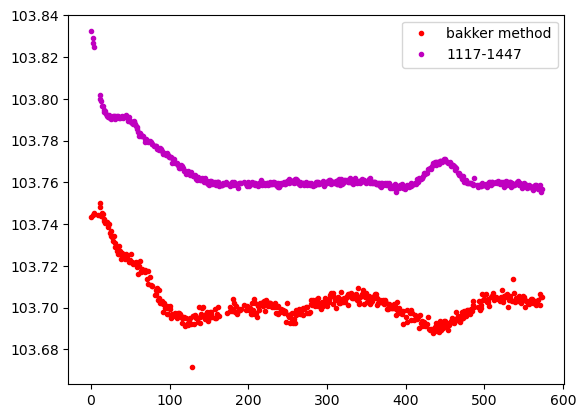

In [75]:
plt.plot(corr_factor_Filt.index, Py_diad2*x_diad2-Py_diad1*x_diad1, '.r', label='bakker method')
split_bak=Py_diad2*x_diad2-Py_diad1*x_diad1
plt.ticklabel_format(useOffset=False)

plt.plot(df2_1117_1447_Filt.index, df2_1117_1447_Filt*split_test, '.m', label='1117-1447')
split_old=df2_1117_1447_Filt*split_test
plt.legend()

In [76]:
## In density space
dens_baker=pf.calculate_density_cornell(temp='SupCrit', Split=split_bak)
dens_old=pf.calculate_density_cornell(temp='SupCrit', Split=split_old)

(0.38, 0.45)

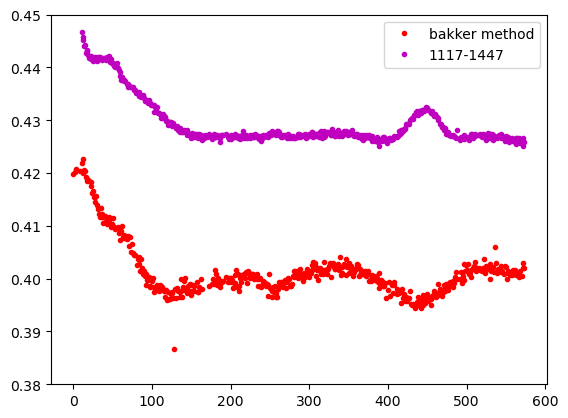

In [53]:
plt.plot(corr_factor_Filt.index, dens_baker['Preferred D'], '.r', label='bakker method')
split_bak=Py_diad2*x_diad2-Py_diad1*x_diad1
plt.ticklabel_format(useOffset=False)

plt.plot(df2_1117_1447_Filt.index, dens_old['Preferred D'], '.m', label='1117-1447')
split_old=df2_1117_1447_Filt*split_test
plt.legend()
plt.ylim([0.38, 0.45])

In [54]:
ax0.plot(ideal_split_1220_1400['Line_2'], Corr_factor_1400_filt[i], 'or')
ax0.plot(ideal_split_1117_1447['Line_2'], Corr_factor_1447_filt[i], 'ob')
ax0.plot(ideal_split_1117_1447['Line_1'], Corr_factor_1117_filt[i], 'oc')
ax0.plot(ideal_split_1310_1567['Line_1'], Corr_factor_1310_filt[i], 'om')
ax0.plot(ideal_split_1310_1567['Line_2'], Corr_factor_1567_filt[i], 'ok')